Importing required libraries

In [115]:
import warnings
warnings.filterwarnings('ignore')

In [116]:
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

Reading the Super Market Sales Dataset

In [117]:
df=pd.read_csv(r"C:\Users\surya pavan\Downloads\archive (12)\supermarket_sales - Sheet1.csv")

<IPython.core.display.Javascript object>

In [118]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [119]:
df.shape

(1000, 17)

In [120]:
df['Invoice ID'].nunique()

1000

In [121]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [122]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We see that, shape of dataset is 1000, i.e., dataset has 1000 rows, and there are no values presnt in the dataset.
Now we create datetime column with date and time columns.

In [123]:
from datetime import datetime
df['Datetime']=(df['Date']+' '+df['Time']).apply(lambda x: datetime.strptime(x,"%m/%d/%Y %H:%M"))


##### Creating a new dataset from the original dataset with features of total sales of each day, day of the weak and the number of sales per day

In [124]:
daily=df.groupby(['Date'])

In [125]:
daily_1=daily['Total'].apply(list)

In [126]:
daily_1.reset_index

<bound method Series.reset_index of Date
1/1/2019     [457.443, 399.756, 470.673, 388.29, 132.762, 1...
1/10/2019    [76.146, 703.752, 161.553, 493.794, 392.6475, ...
1/11/2019    [183.036, 94.1745, 235.683, 345.786, 72.3975, ...
1/12/2019    [189.0945, 931.035, 419.832, 120.162, 28.4235,...
1/13/2019    [437.325, 78.0045, 147.798, 125.706, 152.019, ...
                                   ...                        
3/5/2019     [277.137, 152.838, 822.255, 610.491, 521.01, 1...
3/6/2019     [166.005, 580.419, 603.624, 456.288, 354.0075,...
3/7/2019     [33.936, 263.97, 69.09, 146.9475, 209.559, 353...
3/8/2019     [80.22, 102.018, 512.19, 291.438, 324.2925, 39...
3/9/2019     [107.142, 394.632, 478.233, 256.7775, 944.622,...
Name: Total, Length: 89, dtype: object>

In [127]:
Sales_Per_Day=[len(i) for i in daily_1]
Total_sales=[sum(i) for i in daily_1]
Date=daily_1.index

In [128]:
Date

Index(['1/1/2019', '1/10/2019', '1/11/2019', '1/12/2019', '1/13/2019',
       '1/14/2019', '1/15/2019', '1/16/2019', '1/17/2019', '1/18/2019',
       '1/19/2019', '1/2/2019', '1/20/2019', '1/21/2019', '1/22/2019',
       '1/23/2019', '1/24/2019', '1/25/2019', '1/26/2019', '1/27/2019',
       '1/28/2019', '1/29/2019', '1/3/2019', '1/30/2019', '1/31/2019',
       '1/4/2019', '1/5/2019', '1/6/2019', '1/7/2019', '1/8/2019', '1/9/2019',
       '2/1/2019', '2/10/2019', '2/11/2019', '2/12/2019', '2/13/2019',
       '2/14/2019', '2/15/2019', '2/16/2019', '2/17/2019', '2/18/2019',
       '2/19/2019', '2/2/2019', '2/20/2019', '2/21/2019', '2/22/2019',
       '2/23/2019', '2/24/2019', '2/25/2019', '2/26/2019', '2/27/2019',
       '2/28/2019', '2/3/2019', '2/4/2019', '2/5/2019', '2/6/2019', '2/7/2019',
       '2/8/2019', '2/9/2019', '3/1/2019', '3/10/2019', '3/11/2019',
       '3/12/2019', '3/13/2019', '3/14/2019', '3/15/2019', '3/16/2019',
       '3/17/2019', '3/18/2019', '3/19/2019', '3/2/2019',

In [129]:
new_df=pd.DataFrame(data={'Date':Date,"Sales_Per_Day":Sales_Per_Day,'Total_sales':Total_sales})

<IPython.core.display.Javascript object>

In [130]:
new_df['Date']=pd.to_datetime(new_df['Date'])

<IPython.core.display.Javascript object>

In [131]:
new_df['Day_of_weak']=new_df['Date'].apply(lambda x: x.day_name())

In [150]:
new_df['Date']=new_df['Date'].sort_values(ascending=True)

## Exploratory Data Analysis 

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


Checking datatypes of all features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Making datetime column as index

In [21]:
df['Datetime']=pd.to_datetime(df['Datetime'])
df.set_index('Datetime')

<IPython.core.display.Javascript object>

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Datetime,,,,,,,,,,,,,,,,,
2019-01-05 13:08:00,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08 10:29:00,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03 13:23:00,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27 20:33:00,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08 10:37:00,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-29 13:46:00,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
2019-03-02 17:16:00,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
2019-02-09 13:22:00,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [22]:
branch=df.groupby(['Branch','City']).size().reset_index()
branch.rename(columns={0:'Shopping Count'},inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Shopping Count'>

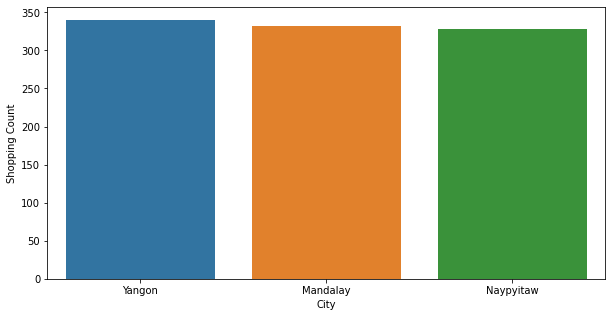

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,5)
sns.barplot(x=branch['City'],y=branch['Shopping Count'],data=branch)

All the branches have similar number of purchases, diferrences are very little.
This indicates that all the branches are running good at their located places

In [24]:
total_sales=df.groupby(['City'])['Total'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Total'>

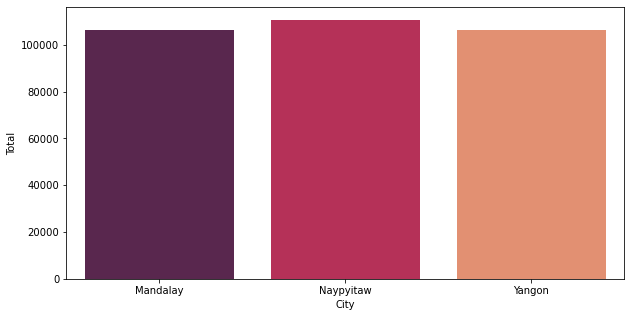

In [25]:
matplotlib.rcParams['figure.figsize']=(10,5)
sns.barplot(x=total_sales['City'],y=total_sales['Total'],data=total_sales,palette='rocket')

Total 3 months sales of each branch are simalar with the others.

Now, let's see the monthly total of each branch

In [26]:
df['Date']=pd.to_datetime(df['Date'])

<IPython.core.display.Javascript object>

In [27]:
df.sort_values('Date',inplace=True)

In [28]:
mask = (df['Date'] > '2019-01-01') & (df['Date'] <= '2019-01-31')

In [29]:
jan=df.loc[mask]

In [30]:
jan_sales=jan.groupby(['City'])['Total'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Total'>

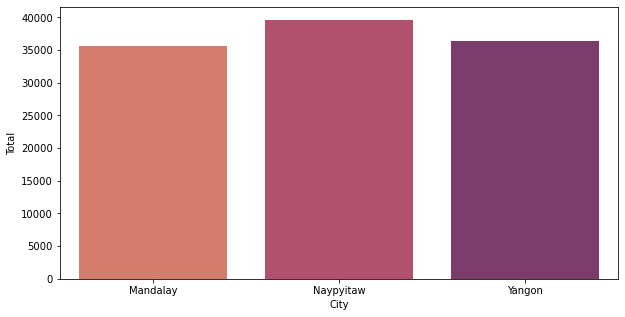

In [31]:
matplotlib.rcParams['figure.figsize']=(10,5)
sns.barplot(x=jan_sales['City'],y=jan_sales['Total'],data=jan_sales,palette='flare')

January month sales in all the branches, shows that Naypyitaw has highest sales than the other 2 branches.

In [32]:
febb= (df['Date'] > '2019-02-01') & (df['Date'] <= '2019-02-28')
feb=df.loc[febb]
feb_sales=feb.groupby(['City'])['Total'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Total'>

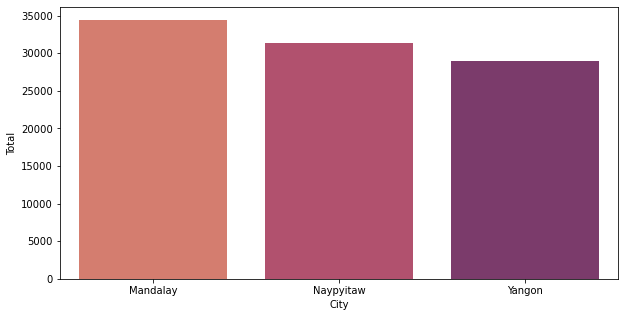

In [33]:
matplotlib.rcParams['figure.figsize']=(10,5)
sns.barplot(x=feb_sales['City'],y=feb_sales['Total'],data=feb_sales,palette='flare')

February sales has been decreased as compared with january month for the branch Naypyitaw.

Mandalay branch sales are looking constant.

Yangon sales has decreased in large amount.

In [34]:
march= (df['Date'] > '2019-03-01') & (df['Date'] <= '2019-03-31')
mar=df.loc[march]
mar_sales=mar.groupby(['City'])['Total'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City', ylabel='Total'>

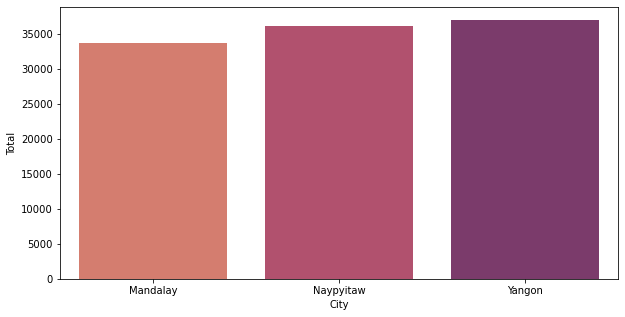

In [35]:
matplotlib.rcParams['figure.figsize']=(10,5)
sns.barplot(x=mar_sales['City'],y=mar_sales['Total'],data=mar_sales,palette='flare')

For the month of march, Yangon branch has the highest sales.

Over all the branches for the 3 months, Naypyitaw branch has highest sales, which is near to 40000.

January was the starting month of new year, so that might be the reason for the highest sales in that branch and all the other branches too

In [36]:
jan_sales

,City,Total
0,Mandalay,35639.3625
1,Naypyitaw,39597.5160
2,Yangon,36309.8085


In [37]:
pie=df.groupby(['Gender']).size().reset_index()
pie.rename(columns={0:'Count'},inplace=True)

In [38]:
pie

,Gender,Count
0,Female,501
1,Male,499


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

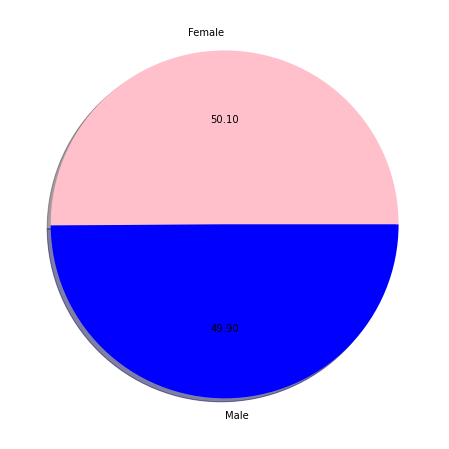

In [178]:
plt.pie(x=pie['Count'],data=pie,labels=['Female','Male'],autopct="%.2f",colors=['pink','blue'],shadow=True)
plt.show()

Males and Females are only differenced with one number.
Females are 501 and males are 499.

In [40]:
gender_prod=df.groupby(['Gender','Product line']).size().reset_index()

In [41]:
gender_prod.rename(columns={0:'Count'},inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Count'>

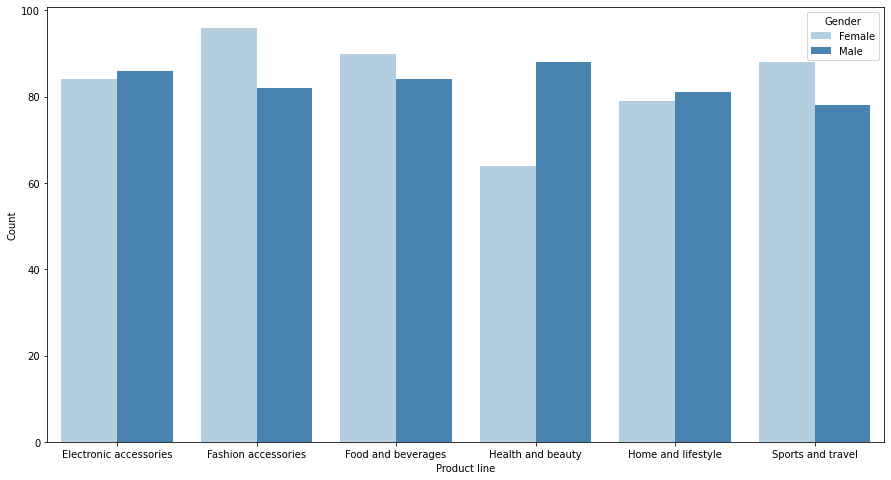

In [42]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=gender_prod['Product line'],y=gender_prod['Count'],data=gender_prod,palette='Blues',hue=gender_prod['Gender'])

The above graph represents the purchases of different type of goods based on gender.

From the entire plot, The major difference we can see in "Healthy and Beauty" products. Those are highly bought by male.

Fashion accessories products are more bought by females than males.


In [43]:
pie1=df.groupby(['Customer type']).size().reset_index()
pie1.rename(columns={0:'Count'},inplace=True)

In [44]:
pie1

,Customer type,Count
0,Member,501
1,Normal,499


members and Normal type of customers are very close to equal.

Now we map this customer type with gender

In [45]:
cus_gen=df.groupby(['Customer type','Gender']).size().reset_index()
cus_gen.rename(columns={0:'Count'},inplace=True)


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Customer type', ylabel='Count'>

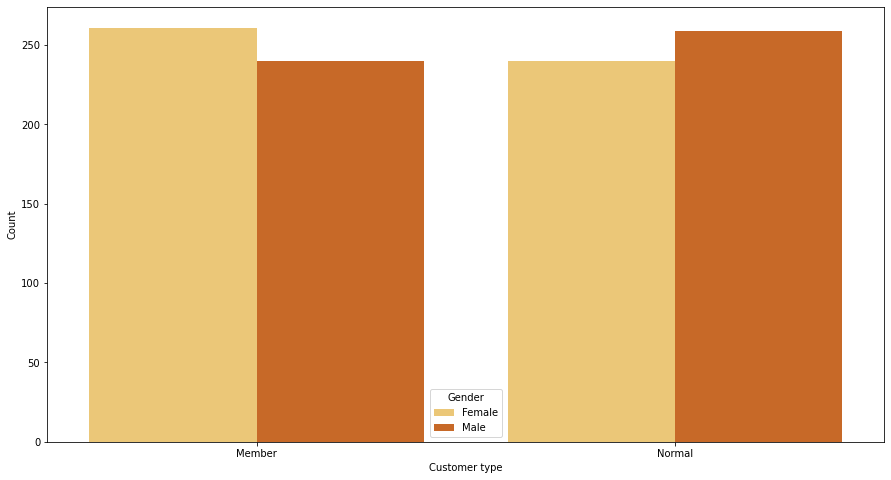

In [46]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=cus_gen['Customer type'],y=cus_gen['Count'],data=cus_gen,palette='YlOrBr',hue=cus_gen['Gender'])

We can clearly observe that males with membership and without membership are very close to equal in number of females with and without of membership.

Both the customers with members and without members are equally purchasing from the store from all the branches.

In [47]:
asap=df.groupby(['Customer type','Product line']).size().reset_index()
asap.rename(columns={0:'Count'},inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Count'>

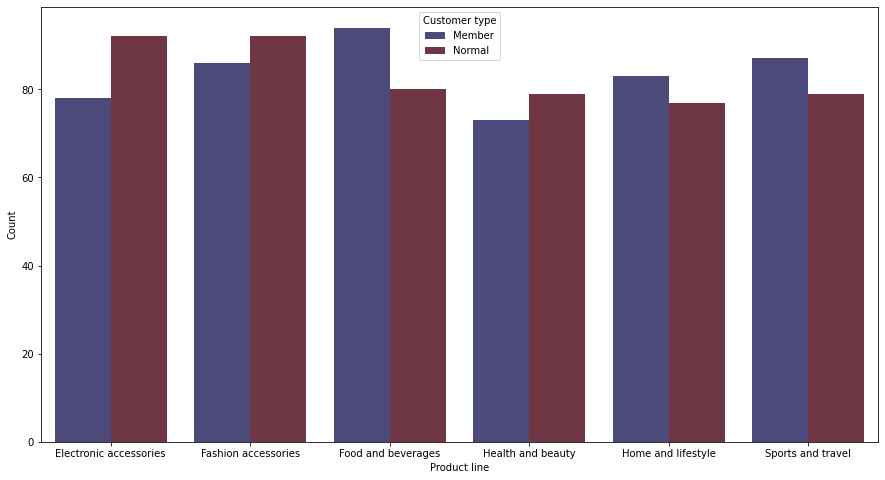

In [48]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=asap['Product line'],y=asap['Count'],data=asap,palette='icefire',hue=asap['Customer type'])

We can observe that, there is no large difference of buying a particular category of goods by a member in comparision with normal.

For the catogory of Food and Beverages, Members bought most and for Electronic accessories products, Normal type of customer bought more than member type of customers

In [49]:
df['Day of Weak']=df['Datetime'].apply(lambda x: x.day_name())

In [50]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day of Weak
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3,2019-01-01 19:31:00,Tuesday
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7,2019-01-01 13:55:00,Tuesday
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,2019-01-01 14:47:00,Tuesday
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,2019-01-01 20:26:00,Tuesday
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,2019-01-01 11:43:00,Tuesday


In [51]:
per_day=df.groupby(['Day of Weak']).size().reset_index().rename(columns={0:'Count'})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Day of Weak', ylabel='Count'>

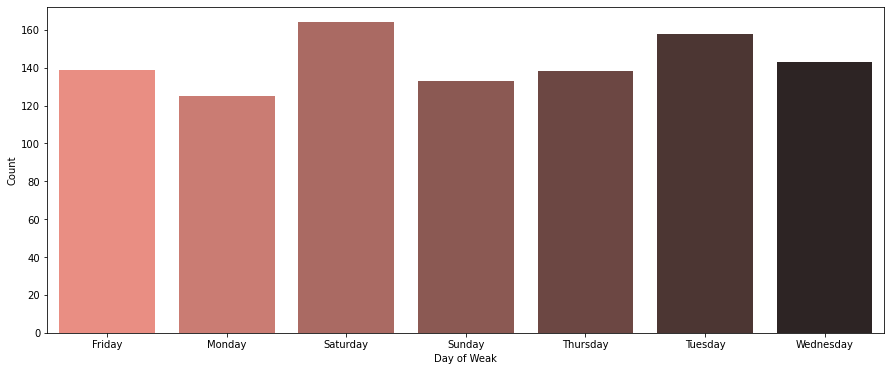

In [52]:
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(x=per_day['Day of Weak'],y=per_day['Count'],palette="dark:salmon_r")

Highest sales are observed on "Saturday" and "Tuesday", which ranges 160+ sales, when considering the entire data.

In [54]:
pro_tot=df.groupby(['Product line'])['Total'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Total'>

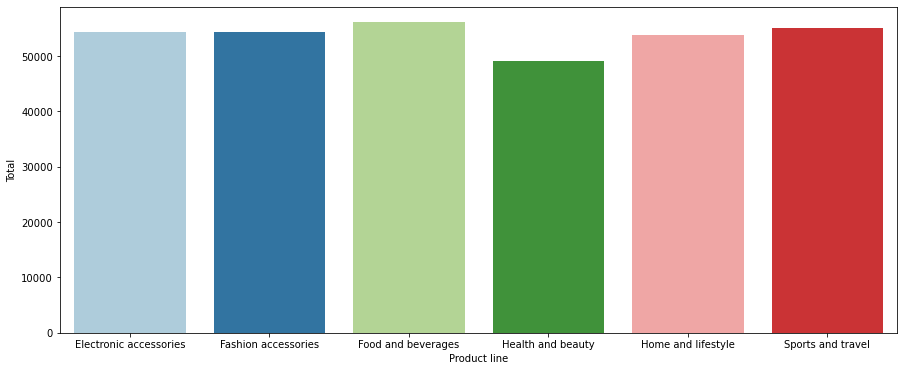

In [55]:
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(x=pro_tot['Product line'],y=pro_tot['Total'],data=pro_tot,palette="Paired")

Looking at the graph, seems that, the money spent on all categories looks equal with small proportions in differnce . The money for purchasing Food and Beverages tops than all the product categories.

#####  Relation of Product line with Quantity

In [56]:
Quant=df.groupby(['Product line'])['Quantity'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Quantity'>

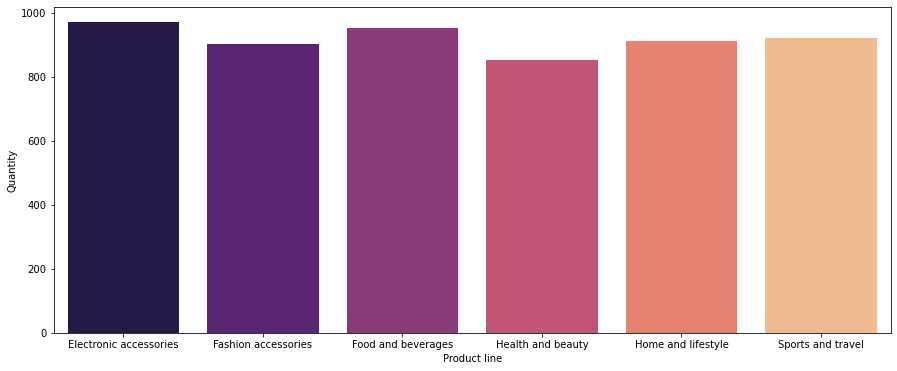

In [57]:
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(x=Quant['Product line'],y=Quant['Quantity'],data=Quant,palette="magma")

Electronic accessories are bought the most and then Food and beverages.

We may garble at one point, people spent most on the Food and beverages and that should also be first in quantity.
But, In quantities perspective, Electronic Accessories are the most.

This makes to think us, food and beverages costs a little bit more than Electronic Accessories.

###### Product category relation with Tax 5%

In [58]:
Taxx=df.groupby(['Product line'])['Tax 5%'].agg('sum').reset_index()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Tax 5%'>

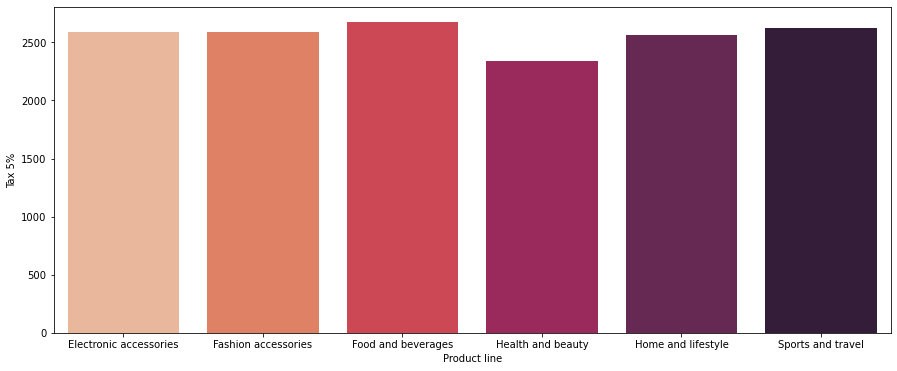

In [59]:
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot(x=Taxx['Product line'],y=Taxx['Tax 5%'],data=Taxx,palette="rocket_r")

The Tax is more collected for the Food and Bevereages Category.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

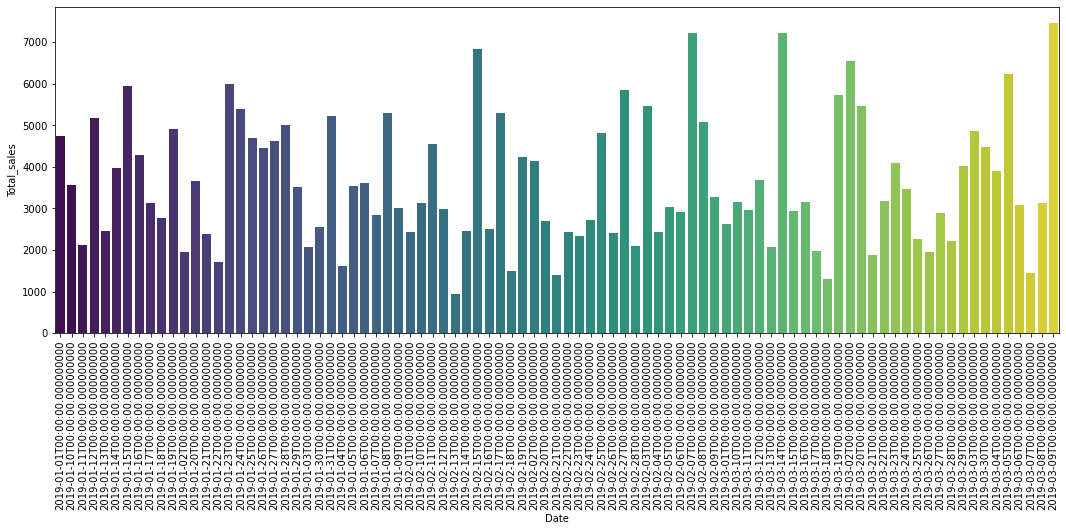

In [60]:
matplotlib.rcParams['figure.figsize']=(18,6)
sns.barplot(x=new_df['Date'],y=new_df['Total_sales'],data=new_df,palette="viridis")
plt.xticks(rotation=90)
plt.show()

We can observe the sales on each day in all the branches, Maximum sales are happening on saturdays




In [61]:
new_df

,Date,Sales_Per_Day,Total_sales,Day_of_weak
0,2019-01-01,12,4745.1810,Tuesday
1,2019-01-10,9,3560.9490,Thursday
2,2019-01-11,8,2114.9625,Friday
3,2019-01-12,11,5184.7635,Saturday
4,2019-01-13,10,2451.2040,Sunday
...,...,...,...,...
84,2019-03-05,17,6230.8785,Tuesday
85,2019-03-06,11,3092.5965,Wednesday
86,2019-03-07,9,1438.2585,Thursday
87,2019-03-08,11,3125.3880,Friday


In [62]:
Pay=df.groupby(['Payment']).size().reset_index().rename(columns={0:'Count'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

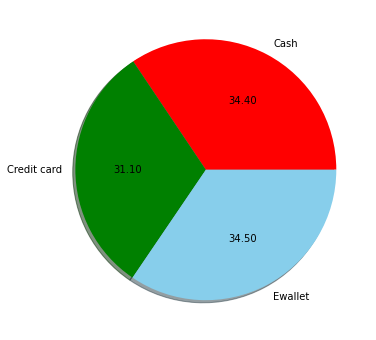

In [63]:
plt.pie(x=Pay['Count'],data=Pay,labels=['Cash','Credit card','Ewallet'],autopct="%.2f",shadow=True,colors=['Red',"Green","Skyblue"])
plt.show()

In [64]:
Pay_mem=df.groupby(['Customer type','Payment']).size().reset_index().rename(columns={0:'Count'})

In [65]:
Pay_mem

,Customer type,Payment,Count
0,Member,Cash,168
1,Member,Credit card,172
2,Member,Ewallet,161
3,Normal,Cash,176
4,Normal,Credit card,139
5,Normal,Ewallet,184


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Payment', ylabel='Count'>

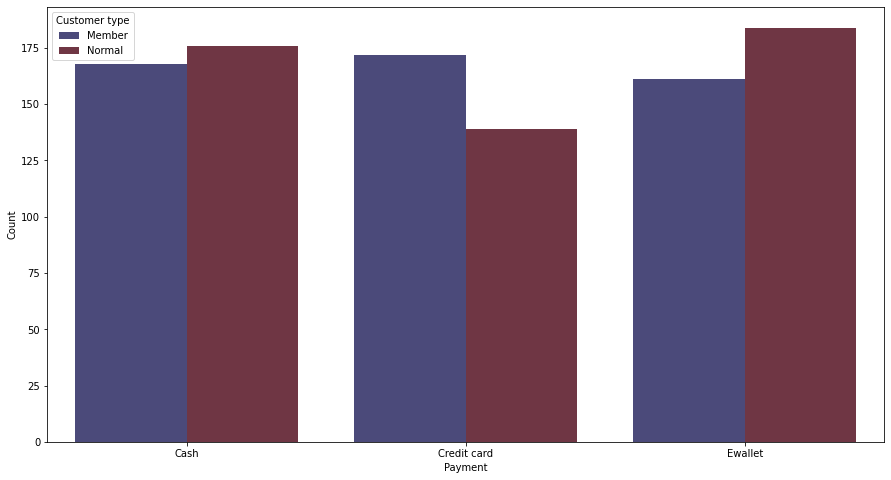

In [66]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=Pay_mem['Payment'],y=Pay_mem['Count'],data=Pay_mem,palette='icefire',hue=Pay_mem['Customer type'])

 The above shows the representation of paying the amount for the goods purchased in 3 different modes with customer type.
 
 Credit card payments are mostly used by Members and Ewallet is mostly used by Normal customers.
 
 Payment of cash is being paid equally in portions of both the customer types.

In [67]:
x=df['Total'].sum()
y=df['gross income'].sum()
z=[x,y]

<IPython.core.display.Javascript object>

<AxesSubplot:>

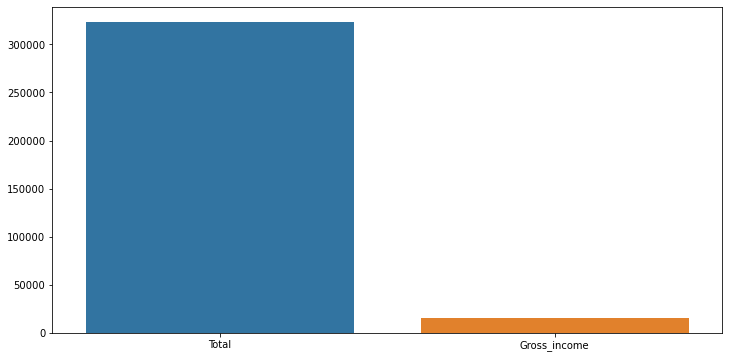

In [68]:
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x=['Total','Gross_income'],y=z)


In [69]:
(df['gross income'].sum()/df['Total'].sum())*100

4.761904761904762

In [70]:
df['Total'].sum()

322966.749

In [71]:
df['gross income'].sum()

15379.369

######  We can clearly see that only 4.76 percent of profit we got, which is gross income for all the sales in those 3 months. For the total sale of  3,22,966 rupees, in that the total profit is 15,379 rupees

In [72]:
Rating=df.groupby(['Product line','Rating']).size().reset_index().rename(columns={0:'Count'})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Rating'>

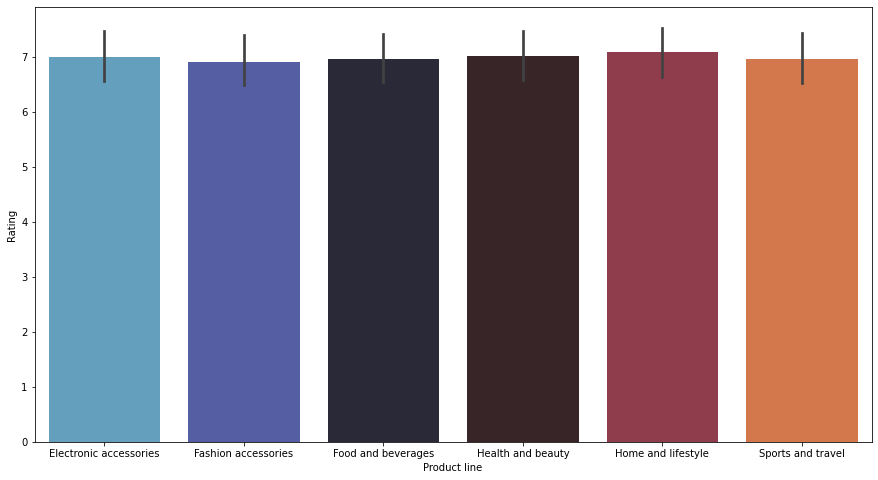

In [73]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=Rating['Product line'],y=Rating['Rating'],data=Rating,palette='icefire')

MAximum all the product have the rating of 7 with some tolerance levels.

Now, we will see what product lines and how many product lines are rated lessthan or equal to 5 out of 1000 records

In [74]:
df['<=5']=df['Rating'].apply(lambda x:1 if(x<=5.0) else 0)

In [75]:
asd=df[df['<=5']==1].groupby(['Product line']).size().reset_index().rename(columns={0:'Count'})

In [76]:
asd

,Product line,Count
0,Electronic accessories,29
1,Fashion accessories,32
2,Food and beverages,27
3,Health and beauty,29
4,Home and lifestyle,31
5,Sports and travel,26


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

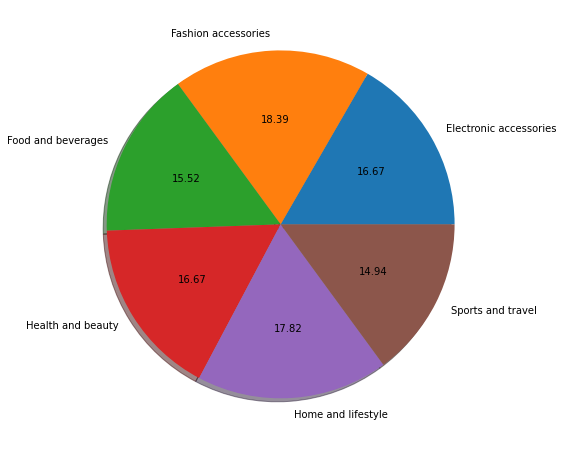

In [77]:
plt.pie(asd['Count'],autopct="%.2f",labels=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel'],shadow=True)
plt.show()

Customers who bought Sports and travel category has given the rating <5 , when compared to all other categories of products 


In [78]:
asdd=df[df['<=5']==1].groupby(['Product line','Customer type']).size().reset_index().rename(columns={0:'Count'})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Count'>

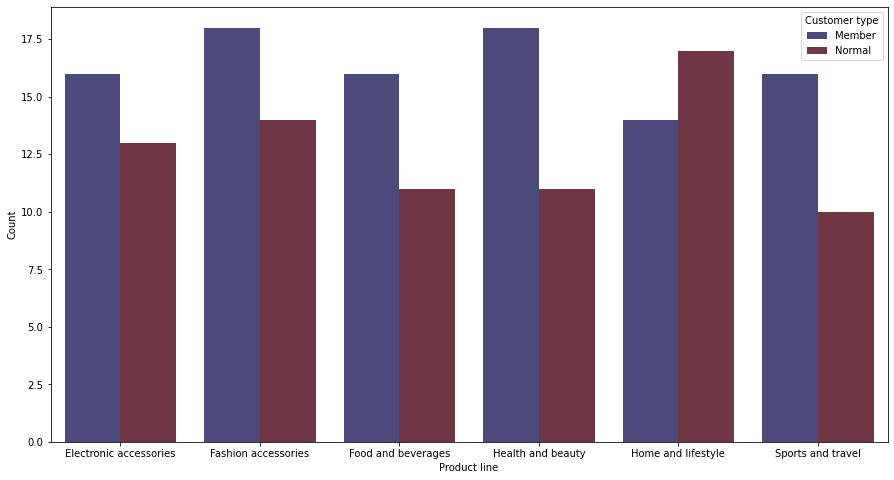

In [82]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=asdd['Product line'],y=asdd['Count'],data=asdd,palette='icefire',hue='Customer type')

The above graph implies, all product categories except of Home and lifestyle, members of customer type have given the less ratings than normal ones.Which is surreal.

Only for the Home and Lifestyle category, Normal type of customer have given the less rating.

In [83]:
branch_wise=df[df['<=5']==1].groupby(['Branch','Product line']).size().reset_index().rename(columns={0:'Count'})

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Product line', ylabel='Count'>

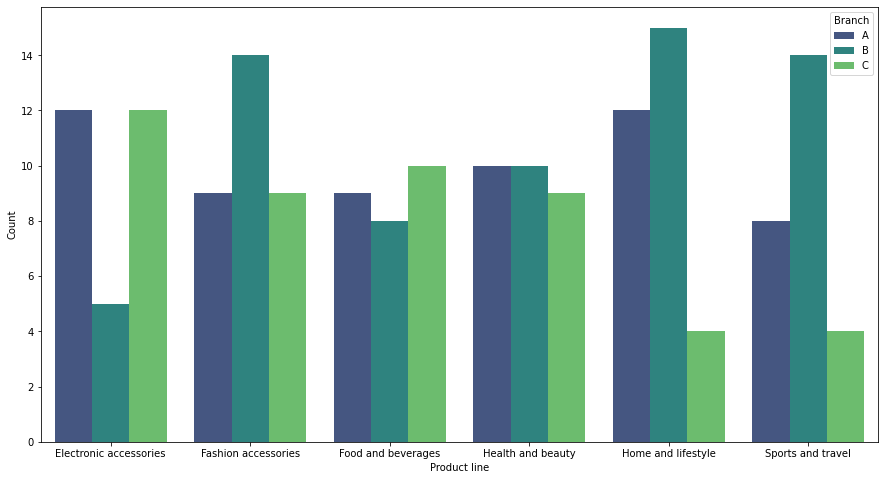

In [84]:
matplotlib.rcParams['figure.figsize']=(15,8)
sns.barplot(x=branch_wise['Product line'],y=branch_wise['Count'],data=branch_wise,palette='viridis',hue='Branch')

We can clearly see that, for the B branch (Mandalay), more number of least ratings got. In Sports and travel, Home and lifestyle and Fashion and accessiories categories of products.

In [85]:
br_wise=df[df['<=5']==1].groupby(['Branch']).size().reset_index().rename(columns={0:'Count'})
br_wise

,Branch,Count
0,A,60
1,B,66
2,C,48


In [86]:
new_df

,Date,Sales_Per_Day,Total_sales,Day_of_weak
0,2019-01-01,12,4745.1810,Tuesday
1,2019-01-10,9,3560.9490,Thursday
2,2019-01-11,8,2114.9625,Friday
3,2019-01-12,11,5184.7635,Saturday
4,2019-01-13,10,2451.2040,Sunday
...,...,...,...,...
84,2019-03-05,17,6230.8785,Tuesday
85,2019-03-06,11,3092.5965,Wednesday
86,2019-03-07,9,1438.2585,Thursday
87,2019-03-08,11,3125.3880,Friday


In [94]:
sales_01= (df['Date'] > '2019-01-01') & (df['Date'] <= '2019-01-31')
sales1=new_df.loc[sales_01]
print('Total no of sales in January month:' ,sales1['Sales_Per_Day'].sum())
print('Total Sales Value is :',sales1['Total_sales'].sum())
print("")
sales_02= (df['Date'] > '2019-02-01') & (df['Date'] <= '2019-02-28')
sales2=new_df.loc[sales_02]
print('Total no of sales in February month:' ,sales2['Sales_Per_Day'].sum())
print('Total Sales Value is :',sales2['Total_sales'].sum())
print("")
sales_03= (df['Date'] > '2019-03-01') & (df['Date'] <= '2019-03-31')
sales3=new_df.loc[sales_03]
print('Total no of sales in March month:' ,sales3['Sales_Per_Day'].sum())
print('Total Sales Value is :',sales3['Total_sales'].sum())

Total no of sales in January month: 286
Total Sales Value is : 91620.98400000001

Total no of sales in February month: 333
Total Sales Value is : 112991.36099999999

Total no of sales in March month: 364
Total Sales Value is : 113654.03700000001


When comparing total sales and total no of sales  of all the months, March month has the highest sales and the highest total sales value in amount.

In [151]:
new_df.set_index(new_df['Date'],inplace=True)


In [152]:
new_df.index

DatetimeIndex(['2019-01-01', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-02',
               '2019-01-20', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-26', '2019-01-27',
               '2019-01-28', '2019-01-29', '2019-01-03', '2019-01-30',
               '2019-01-31', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-02-01',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-02', '2019-02-20',
               '2019-02-21', '2019-02-22', '2019-02-23', '2019-02-24',
               '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28',
               '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
      

In [156]:
new_df.index=new_df.index.sort_values(ascending=True)

In [158]:
new_df.index.freq="D"

In [162]:
new_df.drop(columns=['Date'],inplace=True)

In [163]:
new_df.head()

,Sales_Per_Day,Total_sales,Day_of_weak
Date,,,
2019-01-01,12,4745.1810,Tuesday
2019-01-02,9,3560.9490,Thursday
2019-01-03,8,2114.9625,Friday
2019-01-04,11,5184.7635,Saturday
2019-01-05,10,2451.2040,Sunday


<AxesSubplot:xlabel='Date'>

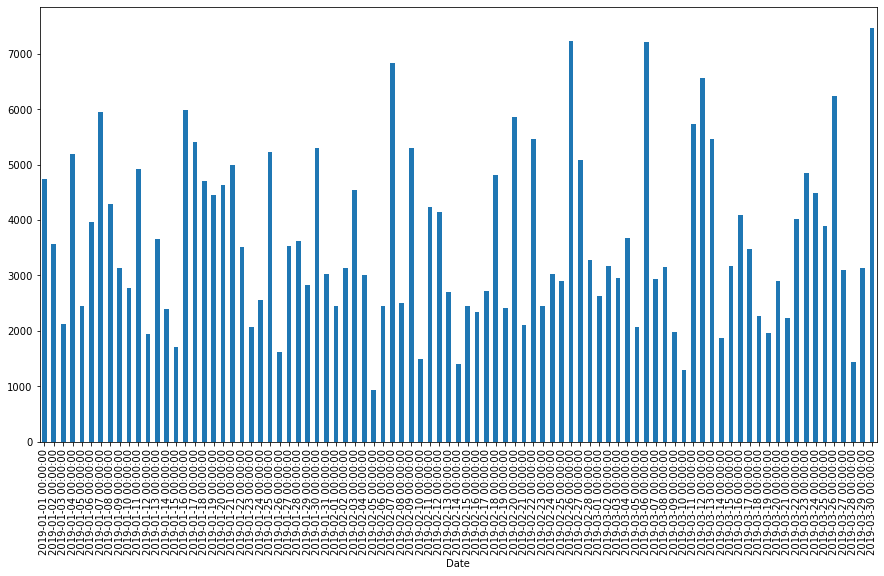

In [167]:
new_df['Total_sales'].plot(kind='bar')

Now, we will check for the stationarity of data for the Total_sales feature

In [171]:
adfull=adfuller(new_df['Total_sales'],autolag='AIC')
labels=['adf','pvalue','usedlag','nobs']
ass_var=pd.Series(data=adfull[:4],index=labels)
ass_var

<IPython.core.display.Javascript object>

adf       -6.710613e+00
pvalue     3.688846e-09
usedlag    2.000000e+00
nobs       8.600000e+01
dtype: float64

In [173]:
for key,value in adfull[4].items():
    ass_var[f'Critical value ({key})']=value
ass_var

adf                    -6.710613e+00
pvalue                  3.688846e-09
usedlag                 2.000000e+00
nobs                    8.600000e+01
Critical value (1%)    -3.508783e+00
Critical value (5%)    -2.895784e+00
Critical value (10%)   -2.585038e+00
dtype: float64

P value is less than 0.05, which means that it rejects null hypothesis and accepts alternate hypothesis.

Data of Total sales is stationary.

### Conclusion

We have analysed the super market sales data completely in every corner in relation with all the features.

From the data, we can observe that, all the branches are running good with little gross income.
sales of all those branches will increase in the future in all the product lines.

